In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import xarray as xr
import glob
import matplotlib.pyplot as plt

In [20]:
year = "2020"
month = "01"
bounding_box = [45.82, 50.65, 8.95, 17.22]

In [21]:
def clip_netcdf_to_bb(netcdf: xr.core.dataset.Dataset, bounding_box: list):
    """Function clips netcdf file (loaded by xarray) to bounding box stored in list"""
    
    # extract long and lat from dataset
    lat = ds['lat']
    lon = ds['lon']
    
    # Determine the indices of the bounding box in the spatial dimensions:
    lat_min, lat_max = bounding_box[0], bounding_box[1]
    lon_min, lon_max = bounding_box[2], bounding_box[3]
    
    lat_indices = (lat >= lat_min) & (lat <= lat_max)
    lon_indices = (lon >= lon_min) & (lon <= lon_max)
    
    # Clip the dataset based on the calculated indices
    clipped_ds = ds.sel(lat=lat_indices, lon=lon_indices)

    return clipped_ds

In [37]:
# read in data 
search_string = f"/mnt/data/raw/cams_euro_aq_reanalysis/{year}/download_{year}_{month}_all_variables/*"
path_to_files = glob.glob(search_string)

for path_to_file in path_to_files:

    # extract variable from path name
    var = path_to_file.split(".")[-4]

    # open dataset
    ds = xr.open_dataset(path_to_file)

    # clipt data to bounding box
    ds_bb = clip_netcdf_to_bb(ds, bounding_box)

    # period averaging
    if var == "O3":
        ds_bb_agg = ds_bb.resample(time="8H").mean()
    else:
        ds_bb_agg= ds_bb.resample(time="24H").mean()

    # 

In [57]:
time_ind = 0
lat_ind = 0
lon_ind = 0 
ds_bb["so2"][time_ind, lat_ind, lon_ind].values

array(1.2607422, dtype=float32)

In [68]:
ds_bb_agg["so2"]

<xarray.DataArray 'so2' (time: 31, lat: 48, lon: 83)>
array([[[2.389201  , 1.9892985 , 1.6288147 , ..., 1.2390646 ,
         1.2474365 , 1.2992452 ],
        [2.2657063 , 1.8907572 , 1.4620972 , ..., 1.3479716 ,
         1.3525187 , 1.2868856 ],
        [2.1450908 , 1.5691833 , 1.1489105 , ..., 1.3906046 ,
         1.3664042 , 1.3507792 ],
        ...,
        [0.63742065, 0.63828534, 0.6672516 , ..., 2.3165894 ,
         2.1145427 , 2.140157  ],
        [0.62118024, 0.60109454, 0.64537555, ..., 2.6197102 ,
         2.7643025 , 2.7351685 ],
        [0.6170807 , 0.59602356, 0.6083781 , ..., 2.7559001 ,
         2.9781291 , 2.9817708 ]],

       [[2.8200276 , 2.3480427 , 1.8633118 , ..., 2.1152039 ,
         1.9396158 , 1.8329672 ],
        [2.4161377 , 1.7769369 , 1.384847  , ..., 2.1910808 ,
         2.0596924 , 1.8850504 ],
        [2.2512615 , 1.7495524 , 1.3147684 , ..., 1.988444  ,
         1.9153646 , 1.7709554 ],
...
        [0.7675578 , 0.803477  , 0.80552167, ..., 2.0538533 ,
         2.0301514 , 2.0250041 ],
        [0.65578204, 0.680486  , 0.69396466, ..., 2.2309978 ,
         2.2595825 , 2.224121  ],
        [0.5511017 , 0.561971  , 0.5700989 , ..., 2.3903198 ,
         2.38503   , 2.3327026 ]],

       [[2.9949543 , 2.427348  , 1.7670288 , ..., 1.0234476 ,
         1.0087891 , 1.0188395 ],
        [3.1006267 , 2.2284138 , 1.5460306 , ..., 1.0233358 ,
         1.0228983 , 1.0053711 ],
        [2.6779988 , 1.8257446 , 1.3755594 , ..., 1.1483866 ,
         1.114858  , 1.0871582 ],
        ...,
        [0.5641022 , 0.56704205, 0.5558624 , ..., 2.0638835 ,
         2.0407307 , 2.0755718 ],
        [0.45954385, 0.4717865 , 0.4718577 , ..., 2.2699585 ,
         2.314331  , 2.3158367 ],
        [0.44298807, 0.40789542, 0.3952179 , ..., 2.5492756 ,
         2.5391438 , 2.4640095 ]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 8.95 9.05 9.15 9.25 9.35 ... 16.85 16.95 17.05 17.15
  * lat      (lat) float64 45.85 45.95 46.05 46.15 ... 50.25 50.35 50.45 50.55
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-01-31
Attributes:
    standard_name:                 mass_concentration_of_sulfur_dioxide_in_air
    long_name:                     mass concentration of sulfur dioxide
    units:                         µg/m3
    cell_methods:                  Time: mean
    number_of_significant_digits:  3
    source:                        mass concentration of sulfur dioxide at 0 ...

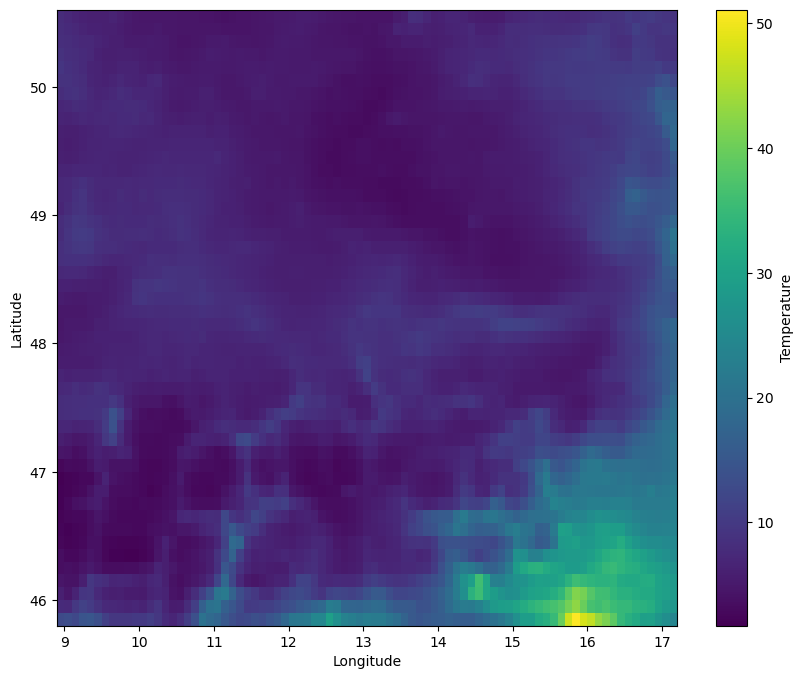

In [17]:
p2m_data = ds_bb_daily_mean.variables["pm2p5"][10]

latitude = ds_bb.variables["lat"][:]
longitude = ds_bb.variables["lon"][:]

# Create a 2D plot using meshgrid and pcolormesh
plt.figure(figsize=(10, 8))
plt.pcolormesh(longitude, latitude, p2m_data, shading='auto')
plt.colorbar(label="Temperature")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
# save clipped nc file
path_to_clipped_file = f"../data/processed/cams_aoi_aq_reanalysis/{year}/aq_aoi_{year}_{month}.nc"
clipped_ds.to_netcdf(path_to_clipped_file)